# Wasserstein Generative Adversarial Network

**Main Improvements:**

1. Earth Mover's Distance (Remove Sigmoid Layer from D).  
2. Weight Clipping after every optimizer step.  

## Imports

### wandb (interactive cell)

In [ ]:
!pip -qqq install wandb pytorch-lightning torchmetrics

import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login()

# API Key:
# d926baa25b6a14ffa4e5c30a6f3bbffbeca8fcf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### Lightning

In [ ]:
try:
  import lightning.pytorch as pl
except:
  print("[!] Couldn't find pytorch-lightning.\nInstalling it...\n")
  !pip install lightning
  import lightning.pytorch as pl

[!] Couldn't find pytorch-lightning.
Installing it...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from lightning.pytorch.utilities.model_summary import ModelSummary

In [ ]:
from pytorch_lightning import seed_everything

### standard imports

In [ ]:
import os
import shutil
import pathlib

from PIL import Image
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset

import torchvision
from torchvision import datasets

In [ ]:
import torchvision.transforms as T
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.utils import make_grid

### Albumentations

In [ ]:
try:
  import albumentations as A
  from albumentations.pytorch import ToTensorV2
except:
  print("[!] Couldn't find albumentations... installing it.")
  !pip install -U albumentations
  import albumentations as A
  from albumentations.pytorch import ToTensorV2

### Torchmetrics

In [ ]:
try:
  import torchmetrics
except:
  print(f"[!] Torchmetrics couldn't be imported.\nInstalling...")
  !pip install torchmetrics

### Custom Definitions

In [ ]:
# Folder Utilities ----------------------------

## Create dir if it doesn't exist
def create_dir(dir_name):
  if not os.path.exists(f'/content/{dir_name}'):
    os.mkdir(f'/content/{dir_name}')

## Delete dir: checkpoints
def delete_dir(dir_name):
  if os.path.isdir(f'/content/{dir_name}'):
    shutil.rmtree(f'/content/{dir_name}')

# ---------------------------------------------

## Config File, Seeds & Devices

In [ ]:
# Log this config file to wandb
CONFIG = dict(
    seed=42,
    DATA_ROOT = '/content/',
    BATCH_SIZE = 64,
    WORKERS = 2,
    IMG_SIZE = (28,28),
    NUM_EPOCHS = 20,
    nz=100,
    lr = 0.00005,
    nc = 1,  
    disc_steps=5,
    checkpoint_path='/content/checkpoints/',
    clipping_c=0.01
    )

In [ ]:
seed_everything(CONFIG['seed'])

INFO:lightning_fabric.utilities.seed:Global seed set to 42


42

In [ ]:
# device = torch.device('cpu')
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

## Transforms

In [ ]:
# train_transform = A.Compose(
#     [
#         A.SmallestMaxSize(max_size=160),
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
#         A.RandomCrop(height=128, width=128),
#         A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
#         A.RandomBrightnessContrast(p=0.5),
#         A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#         ToTensorV2(),
#     ]
# )

## Dataset & DataLoaders (use lightning's Data Module class this time)

In [ ]:
train_data = torchvision.datasets.FashionMNIST(root="train_data", 
                                               train = True, 
                                               transform = ToTensor(), 
                                               target_transform = None, 
                                               download = True)

test_data = torchvision.datasets.FashionMNIST(root="test_data",
                                              train=False, 
                                              transform=ToTensor(), 
                                              target_transform=False, 
                                              download=True)

In [ ]:
print(len(test_data), len(train_data))

10000 60000


In [ ]:
train_dataloader = DataLoader(train_data, batch_size=CONFIG['BATCH_SIZE'], shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=CONFIG['BATCH_SIZE'], shuffle=True)

## Sanity Visualizations

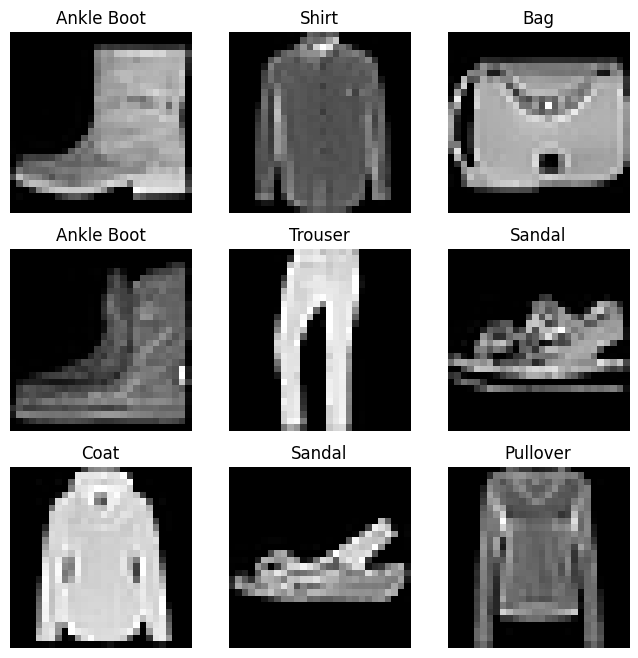

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    # print(img.shape)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Model Arch

In [ ]:
from torchvision import models
from torchsummary import summary

### Discriminator

> No Sigmoid at the end!   
> Values can range from -∞ to ∞

In [ ]:
class Discriminator(nn.Module):
  def __init__(self, img_shape):
    super().__init__()

    self.img_shape = img_shape
    self.model = nn.Sequential(
        nn.Linear(int(np.prod(self.img_shape)), 512),
        nn.ReLU(inplace=True),
        nn.Linear(512, 256),
        nn.ReLU(inplace=True),
        nn.Linear(256, 128),
        nn.ReLU(inplace=True),   
        nn.Linear(128,1)
    )
  
  def forward(self, x):
    x = x.view(x.size(0), -1)
    real_or_fake = self.model(x)
    return real_or_fake

In [ ]:
d = Discriminator(img_shape=CONFIG['IMG_SIZE']).to(device)
summary(d, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
              ReLU-4                  [-1, 256]               0
            Linear-5                  [-1, 128]          32,896
              ReLU-6                  [-1, 128]               0
            Linear-7                    [-1, 1]             129
Total params: 566,273
Trainable params: 566,273
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.16
Estimated Total Size (MB): 2.18
----------------------------------------------------------------


### Generator

In [ ]:
class Generator(nn.Module):
  def __init__(self, img_shape, latent_dim: int = 100):
    super().__init__()

    self.img_shape = img_shape

    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(latent_dim, 128),
        nn.ReLU(inplace=True),
        nn.Linear(128, 256),
        nn.ReLU(inplace=True),
        nn.Linear(256, 512),
        nn.ReLU(inplace=True),
        nn.Linear(512, 784),
        nn.Sigmoid()          
    )
  
  def forward(self, z):
    img = self.model(z)
    img = img.view(img.size(0), *self.img_shape)
    return img

In [ ]:
g = Generator(CONFIG['IMG_SIZE']).to(device)
summary(g, (100, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 100]               0
            Linear-2                  [-1, 128]          12,928
              ReLU-3                  [-1, 128]               0
            Linear-4                  [-1, 256]          33,024
              ReLU-5                  [-1, 256]               0
            Linear-6                  [-1, 512]         131,584
              ReLU-7                  [-1, 512]               0
            Linear-8                  [-1, 784]         402,192
           Sigmoid-9                  [-1, 784]               0
Total params: 579,728
Trainable params: 579,728
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 2.21
Estimated Total Size (MB): 2.24
-------------------------------------------

## Lightning Recipe

In [ ]:
class LIT_WGAN(pl.LightningModule):
  
  def __init__(self, 
               discriminator_model, 
               generator_model, 
               latent_dim: int = 100, 
               lr: float = 0.003, 
               clipping_c: float = 0.01,
               disc_steps: int = 5):
    
    super().__init__()
    self.save_hyperparameters(ignore=[discriminator_model, generator_model])
    self.automatic_optimization = False

    self.discriminator = discriminator_model
    self.generator = generator_model
    self.weight_cliping_limit = clipping_c
  
  def configure_optimizers(self):
    lr = self.hparams.lr

    optim_g = torch.optim.RMSprop(self.generator.parameters(), lr=lr)
    optim_d = torch.optim.RMSprop(self.discriminator.parameters(), lr=lr)

    return [optim_g, optim_d], []


  def forward(self, z):
    return self.generator(z)
 

  def test_step(self, batch, batch_idx): # Use for Exploring the latent space 
    imgs, _ = batch
    pass


  def training_step(self, batch, batch_idx):
    imgs, _ = batch
    # print(f"{batch_idx}:: imgs.shape =",imgs.shape)
    opt_g, opt_d = self.optimizers()

    z = torch.randn(imgs.shape[0], self.hparams.latent_dim, 1, 1) # N x Z_d x 1 x 1
    z = z.type_as(imgs)

    # print(f"Disc out shape:", self.discriminator(self(z)).shape)

    # Train G:
    self.toggle_optimizer(opt_g)
    
    # Generator loss:
    fake_imgs = self.generator(z)
    # print(f"Gen out: {fake_imgs.shape}")
    # print(f"Disc out: {self.discriminator(fake_imgs).mean(0).shape}")
    g_loss = -1.0 * self.discriminator(fake_imgs).mean(0) # minus to minimize g_loss:: ideal out per example: -inf

    # Grad step:
    self.manual_backward(g_loss)
    opt_g.step()
    opt_g.zero_grad()

        
    self.untoggle_optimizer(opt_g)

    # Train Discriminator
    self.toggle_optimizer(opt_d)

    for i in range(self.hparams.disc_steps): # 5 (from WGAN paper)
      # Discriminator loss:
      d_loss_real = -1.0 * self.discriminator(imgs).mean(0) # move towards -inf
      d_loss_fake = self.discriminator(self.generator(z)).mean(0) # move towards -inf

      d_loss = (d_loss_fake + d_loss_real) / 2.

      # self.log("d_loss", d_loss, prog_bar=True)
      self.manual_backward(d_loss)
      opt_d.step()

      for weight in self.discriminator.parameters():
        weight.data.clamp_(-self.weight_cliping_limit, self.weight_cliping_limit)

      opt_d.zero_grad()
    

    self.untoggle_optimizer(opt_d)
    # print(fake_imgs[0].shape)
    
    self.logger.experiment.log({"Gen_Image_1 (during training)":[wandb.Image(fake_imgs[0].cpu(), caption="Gen Out")]})

    self.log_dict({"g_loss": g_loss, "d_loss": d_loss}, 
                  on_step=True, 
                  on_epoch=True, 
                  prog_bar=True, 
                  logger=True)


In [ ]:
wgan = LIT_WGAN(
      discriminator_model = Discriminator(CONFIG['IMG_SIZE']), 
      generator_model = Generator(CONFIG['IMG_SIZE']), 
      latent_dim = CONFIG['nz'],
      lr=CONFIG['lr'],
      clipping_c = CONFIG['clipping_c'],
      disc_steps=CONFIG['disc_steps']
    )

summary = ModelSummary(wgan, max_depth=-1)
print(summary)

   | Name                  | Type          | Params
---------------------------------------------------------
0  | discriminator         | Discriminator | 566 K 
1  | discriminator.model   | Sequential    | 566 K 
2  | discriminator.model.0 | Linear        | 401 K 
3  | discriminator.model.1 | ReLU          | 0     
4  | discriminator.model.2 | Linear        | 131 K 
5  | discriminator.model.3 | ReLU          | 0     
6  | discriminator.model.4 | Linear        | 32.9 K
7  | discriminator.model.5 | ReLU          | 0     
8  | discriminator.model.6 | Linear        | 129   
9  | generator             | Generator     | 579 K 
10 | generator.model       | Sequential    | 579 K 
11 | generator.model.0     | Flatten       | 0     
12 | generator.model.1     | Linear        | 12.9 K
13 | generator.model.2     | ReLU          | 0     
14 | generator.model.3     | Linear        | 33.0 K
15 | generator.model.4     | ReLU          | 0     
16 | generator.model.5     | Linear        | 131 K 
17 | g

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'discriminator_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['discriminator_model'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'generator_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['generator_model'])`.
  rank_zero_warn(


## Logger: Proj, Run ... Names

In [ ]:
wandb_logger = WandbLogger(project='M2-WGAN', 
                           name='exp-1_sanity',
                           config=CONFIG,
                           job_type='train',
                           log_model="all")

## Trainer Callbacks

In [ ]:
from pytorch_lightning import Callback
from lightning.pytorch.callbacks import DeviceStatsMonitor, TQDMProgressBar, ModelCheckpoint, EarlyStopping, LearningRateMonitor

# Checkpoint
checkpoint_callback = ModelCheckpoint(dirpath=CONFIG['checkpoint_path'],
                                      filename='{epoch}-{g_loss:.3f}',
                                      monitor='g_loss',
                                      save_top_k=-1,
                                      save_last=True,
                                      save_weights_only=True,
                                      verbose=True,
                                      mode='min')

# Exp2: Learning Rate Monitor
lr_monitor = LearningRateMonitor(logging_interval='step', log_momentum=False)

# Earlystopping
# earlystopping = EarlyStopping(monitor='val_d_acc', patience=3, mode='min')

## Trainer

In [ ]:
trainer = pl.Trainer(fast_dev_run=False,    # For debugging purposes
                     log_every_n_steps=1,   # set the logging frequency
                     accelerator='auto',    # Precedence: tpu > gpu >> cpu
                     devices="auto",        # all
                     max_epochs= 5,         # CONFIG['NUM_EPOCHS'],
                     callbacks=[TQDMProgressBar(refresh_rate=25), 
                                checkpoint_callback, 
                                lr_monitor],
                     logger=wandb_logger,    # wandb <3
                     )

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


## Training

In [ ]:
trainer.fit(wgan, train_dataloader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type          | Params
------------------------------------------------
0 | discriminator | Discriminator | 566 K 
1 | generator     | Generator     | 579 K 
------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.584     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | discriminator | Discriminator | 566 K 
1 | generator     | Generator     | 579 K 
------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.584     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO: Epoch 0, global step 5628: 'g_loss' reached 0.09984 (best 0.09984), saving model to '/content/checkpoints/epoch=0-g_loss=0.100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 5628: 'g_loss' reached 0.09984 (best 0.09984), saving model to '/content/checkpoints/epoch=0-g_loss=0.100.ckpt' as top 1
INFO: Epoch 1, global step 11256: 'g_loss' reached -0.00349 (best -0.00349), saving model to '/content/checkpoints/epoch=1-g_loss=-0.003.ckpt' as top 2
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 11256: 'g_loss' reached -0.00349 (best -0.00349), saving model to '/content/checkpoints/epoch=1-g_loss=-0.003.ckpt' as top 2
INFO: Epoch 2, global step 16884: 'g_loss' reached -0.04760 (best -0.04760), saving model to '/content/checkpoints/epoch=2-g_loss=-0.048.ckpt' as top 3
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 16884: 'g_loss' reached -0.04760 (best -0.04760), saving model to '/content/checkpoints/epoch=2-g_loss=-0.048.

## Call Finish on Exp logger

In [ ]:
wandb.finish()

d_loss_step,█▇▁▃█▇▂▂▄▄▄▅█▅▁▄▄▅▆▇█▇▅▅▆▅▄▄▃▄▃▃▃▃▃▃▃▃▃▃
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
g_loss_step,▃▃▅▆▃▃▄▅▇▇██▃▄▇▇██▇▆▅▃▄▃▃▁▂▂▂▂▃▃▃▃▂▁▄▁▃▄
lr-RMSprop,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr-RMSprop-1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▂▁▁▁▂▂▂▃▃▃▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
d_loss_step,-0.5072
epoch,0
g_loss_step,0.38969
lr-RMSprop,5e-05
lr-RMSprop-1,5e-05


## WGAN-GP

### Gen

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim, img_shape):
        super(Generator, self).__init__()
        self.img_shape = img_shape

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], *self.img_shape)
        return img

### Disc

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, img_shape):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity

### Recipe

In [ ]:
class LIT_WGANGP(LightningModule):
    def __init__(self,
                 latent_dim: int = 100,
                 lr: float = 0.0002,
                 b1: float = 0.5,
                 b2: float = 0.999,
                 batch_size: int = 64, **kwargs):
        super().__init__()
        self.save_hyperparameters()

        self.latent_dim = latent_dim
        self.lr = lr
        self.b1 = b1
        self.b2 = b2
        self.batch_size = batch_size

        # networks
        mnist_shape = (1, 28, 28)
        self.generator = Generator(latent_dim=self.latent_dim, img_shape=mnist_shape)
        self.discriminator = Discriminator(img_shape=mnist_shape)

        self.validation_z = torch.randn(8, self.latent_dim)

        self.example_input_array = torch.zeros(2, self.latent_dim)

    def forward(self, z):
        return self.generator(z)

    def compute_gradient_penalty(self, real_samples, fake_samples):
        # Random weight term for interpolation between real and fake samples
        alpha = torch.Tensor(np.random.random((real_samples.size(0), 1, 1, 1))).to(self.device)
        # Get random interpolation between real and fake samples
        interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True)
        interpolates = interpolates.to(self.device)
        d_interpolates = self.discriminator(interpolates)
        fake = torch.Tensor(real_samples.shape[0], 1).fill_(1.0).to(self.device)
        # Get gradient w.r.t. interpolates
        gradients = torch.autograd.grad(
            outputs=d_interpolates,
            inputs=interpolates,
            grad_outputs=fake,
            create_graph=True,
            retain_graph=True,
            only_inputs=True,
        )[0]
        gradients = gradients.view(gradients.size(0), -1).to(self.device)
        gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
        return gradient_penalty

    def training_step(self, batch, batch_idx, optimizer_idx):
        imgs, _ = batch

        # sample noise
        z = torch.randn(imgs.shape[0], self.latent_dim)
        z = z.type_as(imgs)

        lambda_gp = 10

        # train generator
        if optimizer_idx == 0:

            # generate images
            self.generated_imgs = self(z)

            # log sampled images
            sample_imgs = self.generated_imgs[:6]
            grid = torchvision.utils.make_grid(sample_imgs)
            self.logger.experiment.add_image('generated_images', grid, 0)

            # ground truth result (ie: all fake)
            # put on GPU because we created this tensor inside training_loop
            valid = torch.ones(imgs.size(0), 1)
            valid = valid.type_as(imgs)

            g_loss = -torch.mean(self.discriminator(self(z)))
            tqdm_dict = {'g_loss': g_loss}
            output = OrderedDict({
                'loss': g_loss,
                'progress_bar': tqdm_dict,
                'log': tqdm_dict
            })
            return output

        # train discriminator
        # Measure discriminator's ability to classify real from generated samples
        elif optimizer_idx == 1:
            fake_imgs = self(z)

            # Real images
            real_validity = self.discriminator(imgs)
            # Fake images
            fake_validity = self.discriminator(fake_imgs)
            # Gradient penalty
            gradient_penalty = self.compute_gradient_penalty(imgs.data, fake_imgs.data)
            # Adversarial loss
            d_loss = -torch.mean(real_validity) + torch.mean(fake_validity) + lambda_gp * gradient_penalty

            tqdm_dict = {'d_loss': d_loss}
            output = OrderedDict({
                'loss': d_loss,
                'progress_bar': tqdm_dict,
                'log': tqdm_dict
            })
            return output

    def configure_optimizers(self):
        n_critic = 5

        lr = self.lr
        b1 = self.b1
        b2 = self.b2

        opt_g = torch.optim.Adam(self.generator.parameters(), lr=lr, betas=(b1, b2))
        opt_d = torch.optim.Adam(self.discriminator.parameters(), lr=lr, betas=(b1, b2))
        return (
            {'optimizer': opt_g, 'frequency': 1},
            {'optimizer': opt_d, 'frequency': n_critic}
        )

    def train_dataloader(self):
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5]),
        ])
        dataset = MNIST(os.getcwd(), train=True, download=True, transform=transform)
        return DataLoader(dataset, batch_size=self.batch_size)

    def on_epoch_end(self):
        z = self.validation_z.to(self.device)

        # log sampled images
        sample_imgs = self(z)
        grid = torchvision.utils.make_grid(sample_imgs)
        self.logger.experiment.add_image('generated_images', grid, self.current_epoch)

### Model Init

In [ ]:
wgan_gp = LIT_WGANGP(batch_size=64) # Try smaller if fails on GPUs

summary_gp = ModelSummary(wgan_gp, max_depth=-1)
print(summary_gp)

### Logger

In [ ]:
wandb_logger = WandbLogger(project='M3-WGANGP', 
                           name='exp-1_sanity',
                           config=CONFIG,
                           job_type='train',
                           log_model="all")

### Callbacks

In [ ]:
# Checkpoint
checkpoint_callback2 = ModelCheckpoint(dirpath=CONFIG['checkpoint_path'],
                                      filename='{epoch}-{g_loss:.3f}',
                                      monitor='g_loss',
                                      save_top_k=-1,
                                      save_last=True,
                                      save_weights_only=True,
                                      verbose=True,
                                      mode='min')

# Exp2: Learning Rate Monitor
lr_monitor2 = LearningRateMonitor(logging_interval='step', log_momentum=False)

# Earlystopping
# earlystopping = EarlyStopping(monitor='val_d_acc', patience=3, mode='min')

### Trainer

In [ ]:
trainer_gp = pl.Trainer(fast_dev_run=False,    # For debugging purposes
                     log_every_n_steps=1,   # set the logging frequency
                     accelerator='auto',    # Precedence: tpu > gpu >> cpu
                     devices="auto",        # all
                     max_epochs= 5,         # CONFIG['NUM_EPOCHS'],
                     callbacks=[TQDMProgressBar(refresh_rate=100), 
                                checkpoint_callback2, 
                                lr_monitor2],
                     logger=wandb_logger,    # wandb <3
                     )

### Fit
**Re-use** train_dataloader from M2: WGAN :p

In [ ]:
trainer_gp.fit(wgan_gp, train_dataloader)

### Finish Logging Sesh!

In [ ]:
wandb.finish()

##  Transforms (to experiment with)

In [ ]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
])

In [ ]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])